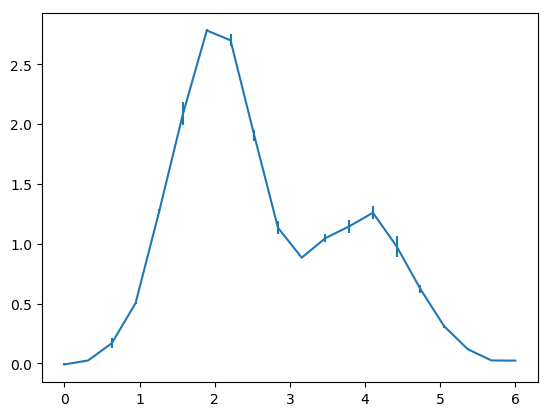

(PyObject <matplotlib.lines.Line2D object at 0x18af84f98>, (), (PyObject <matplotlib.collections.LineCollection object at 0x1214a6cc0>,))

In [1]:
using PyCall
include("../src/gauss_error.jl")
include("../src/kernels.jl")

a = 0.
b = 6.
y = collect(range(a, stop=b, length=20))
# f = [-0.00906047, 0.0239243, 0.168545, 0.503525, 1.27398,
#     2.08793, 2.78204, 2.5939, 1.90542, 1.13321,
#     0.88324, 1.04642, 1.14465, 1.25853, 0.977623,
#     0.621435, 0.310866, 0.117351, 0.0240617, 0.0226408]
f = [-0.00906047, 0.0239243, 0.168545, 0.503525, 1.27398,
    2.08793, 2.78204, 2.7, 1.90542, 1.13321,
    0.88324, 1.04642, 1.14465, 1.25853, 0.977623,
    0.621435, 0.310866, 0.117351, 0.0240617, 0.0226408]
# delta_f = [0.00888777, -0.00480116, 0.0396684, -0.00968618, -0.0195524,
#     -0.0988949, 0.00829277, 0.0494844, -0.0445353, 0.0556071,
#     0.00347363, 0.0317405, 0.0539028, 0.0545216, 0.0870875,
#     0.0338332, -0.0121158, 0.00790281, 0.00138139, 0.00662381]
delta_f = [0.00888777, 0.00480116, -0.0396684, -0.00968618, 0.0195524,
    -0.0988949, 0.00829277, 0.0494844, -0.0445353, 0.0556071,
    0.00347363, 0.0317405, 0.0539028, -0.0545216, 0.0870875,
    0.0338332, 0.0121158, -0.00790281, 0.00138139, -0.00662381]

using PyPlot
errorbar(y, f, yerr=delta_f)

In [2]:
function kernel(x::Real, y::Real)
    if abs(x-y) <= 1
        return 1. -  abs(x-y)
    end
    return 0.
end

kernel (generic function with 1 method)

In [3]:
basis = CubicSplineBasis(y, ("dirichlet", "dirichlet"))
# basis = FourierBasis(a, b, 45)
println()

┌ Info: Cubic spline basis is created.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:238


┌ Info: GaussErrorMatrixUnfolder is created
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:118
┌ Info: GaussErrorUnfolder is created.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:333
┌ Info: Starting solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:367
┌ Info: Starting discretize kernel...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:48
┌ Info: Kernel was discretized successfully.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:59
┌ Info: Ending solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:395
┌ Info: Starting solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:149
┌ Info: Ending solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:177
┌ Info: Starting solve_correct...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:188
┌ Info: Starting find_optimal_

Iter     Function value   Gradient norm 
     0    -1.216020e+03     1.722037e+02
     1    -1.317550e+03     3.654281e-01


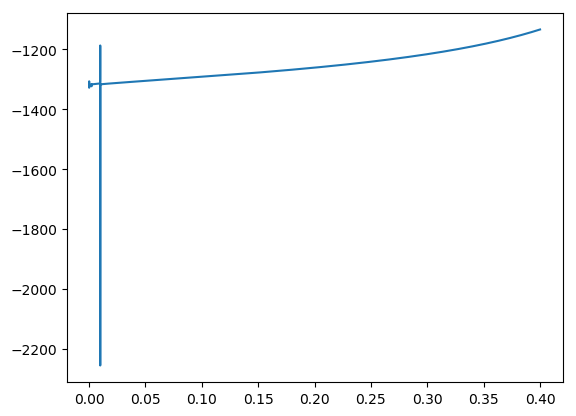

┌ Warning: Linesearch failed, using alpha = 0.0032134851219125403 and exiting optimization.
│ The linesearch exited with message:
│ Linesearch failed to converge, reached maximum iterations 50.
└ @ Optim /Users/ta_nyan/.julia/packages/Optim/Agd3B/src/utilities/perform_linesearch.jl:47
┌ Warning: Minimization did not succeed, alpha = [1.00007e-5], return alpha = 0.05.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:262
┌ Info: Ending solve_correct...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:286


Dict{String,Array{<:Real,N} where N} with 3 entries:
  "errors" => [0.0247056 0.00944885 … -0.00029416 -0.000113186; 0.00944885 0.07…
  "alphas" => [0.05]
  "coeff"  => [0.0984805, 0.231399, -0.380083, -0.620634, 0.514025, 2.48798, 3.…

In [20]:
Omega = omega(basis, 2)
# matshow(Omega)
# colorbar()
model = GaussErrorUnfolder(basis, [Omega], "EmpiricalBayes", nothing, [1e-5], [0.4], [0.3])#, "User", [0.005])
result = solve(model, kernel, f, delta_f, y)


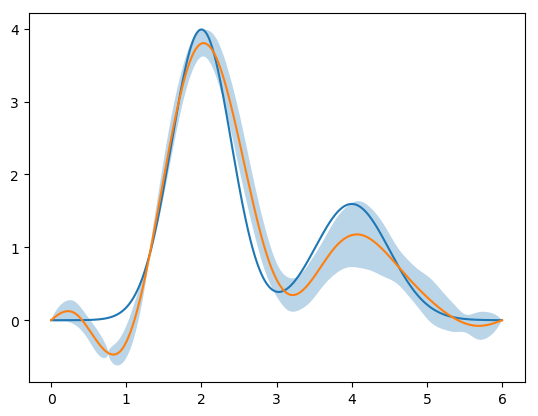

┌ Info: PhiVec is created.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/vector.jl:69


PyObject <matplotlib.collections.PolyCollection object at 0x19f8450b8>

In [21]:
phivec = PhiVec(result, basis)
z = collect(range(a, stop=b, length=1000))
plot(z, real_phi.(z))
phi_reconstructed = phivec.phi_function.(z)
phi_reconstructed_errors = phivec.error_function.(z)
plot(z, phi_reconstructed)
fill_between(z, phi_reconstructed - phi_reconstructed_errors, phi_reconstructed + phi_reconstructed_errors, alpha=0.3)